In [8]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer 
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# Importar Raw Data
El siguiente data set consiste en definir la posicion (Tags-RoomID) de un dispositivo electronico con conexion wifi a un router, basado en la intensidad de conexión entre un Dispositivo y un RouterX con los features (RouterA, RouterB,....,RouterG)

In [9]:
# Importar Raw Data
# https://www.kaggle.com/yashsawarn/wifi-stretgth-for-rooms
# Base de datos modificados para generar Valores Faltantes
# Base de datos modificadas para generar Outliers
dataset = pd.read_csv('train-wifi stretgth for rooms.csv')
dataset = dataset.iloc[:,1::]#Remover el ID de las observaciones, informacion no relevante
#dataset = dataset.head(n=30) #Descomentar linea si quiero los primero n elementos del dataset
print("Cantidad de elementos NaN por columna")
print(dataset.isna().sum())
print("******************************************************")
print("Visualizacion de los primeros elementos del dataset")
dataset.head(100)

Cantidad de elementos NaN por columna
Router A    10
Router B    11
Router C     8
Router D     9
Router E    10
Router F    13
Router G     8
Room ID      0
dtype: int64
******************************************************
Visualizacion de los primeros elementos del dataset


,Router A,Router B,Router C,Router D,Router E,Router F,Router G,Room ID
0,-64.0,-56.0,-61.0,-66.0,-71.0,-82.0,-81.0,1
1,-68.0,-57.0,-61.0,-65.0,-71.0,-85.0,-85.0,1
2,-63.0,-60.0,-60.0,-67.0,-76.0,-85.0,-84.0,1
3,-61.0,-60.0,-68.0,-5.0,-77.0,-90.0,-80.0,1
4,-63.0,-65.0,-60.0,-63.0,-77.0,-81.0,-87.0,1
...,...,...,...,...,...,...,...,...
95,-74.0,-62.0,-66.0,-70.0,-76.0,-89.0,-87.0,1
96,-71.0,-62.0,-63.0,-69.0,-75.0,-85.0,-87.0,1
97,-71.0,-64.0,-64.0,-70.0,-78.0,-88.0,-94.0,1
98,-70.0,-64.0,-66.0,-73.0,-78.0,-87.0,-94.0,1


# Tecnica de sustitucion de valores faltantes.

In [10]:
dataset.fillna(dataset.mean(), inplace = True)
print("Cantidad de elementos NaN por columna")
print(dataset.isna().sum())
print("******************************************************")
print("Se observa que los NaN han sido eliminados")
dataset.head(n=100)



Cantidad de elementos NaN por columna
Router A    0
Router B    0
Router C    0
Router D    0
Router E    0
Router F    0
Router G    0
Room ID     0
dtype: int64
******************************************************
Se observa que los NaN han sido eliminados


,Router A,Router B,Router C,Router D,Router E,Router F,Router G,Room ID
0,-64.0,-56.0,-61.0,-66.0,-71.0,-82.0,-81.0,1
1,-68.0,-57.0,-61.0,-65.0,-71.0,-85.0,-85.0,1
2,-63.0,-60.0,-60.0,-67.0,-76.0,-85.0,-84.0,1
3,-61.0,-60.0,-68.0,-5.0,-77.0,-90.0,-80.0,1
4,-63.0,-65.0,-60.0,-63.0,-77.0,-81.0,-87.0,1
...,...,...,...,...,...,...,...,...
95,-74.0,-62.0,-66.0,-70.0,-76.0,-89.0,-87.0,1
96,-71.0,-62.0,-63.0,-69.0,-75.0,-85.0,-87.0,1
97,-71.0,-64.0,-64.0,-70.0,-78.0,-88.0,-94.0,1
98,-70.0,-64.0,-66.0,-73.0,-78.0,-87.0,-94.0,1


# Exploración de datos

{'whiskers': [<matplotlib.lines.Line2D at 0x24e48f8a130>,
 'caps': [<matplotlib.lines.Line2D at 0x24e48f8a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e48f7cd90>,
 'medians': [<matplotlib.lines.Line2D at 0x24e48f8aeb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24e48f96250>,
 'means': []}

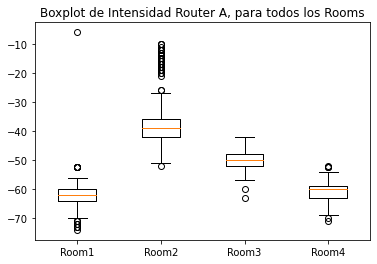

In [11]:
df = pd.DataFrame(dataset, columns= ['Router A','Room ID'])
df.head()

x1= df[df['Room ID']==1].iloc[:,0]
x2= df[df['Room ID']==2].iloc[:,0]
x3= df[df['Room ID']==3].iloc[:,0]
x4= df[df['Room ID']==4].iloc[:,0]

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot de Intensidad Router A, para todos los Rooms')
ax1.boxplot([x1, x2, x3,x4], labels=['Room1','Room2','Room3','Room4'])



# Tecnica de deteccion/eliminacion de outliers.

In [12]:

def removeOutlier(matrix,column):    
    print("################################################################")
    print("Evaluando valores de la columna#",column)
    columna = matrix[:,column] 
    mean = np.mean(columna, axis = 0)  
    print("Media",mean)
    sd = np.std(columna, axis = 0)
    print("Desviacion estandar",sd)
    i = 0
    itemToDelete = []
    upperLimit = mean + 3*sd
    lowerLimit = mean - 3*sd
    print("Rango de valores aceptables [",lowerLimit,",",upperLimit,"]")
    for k in columna:              
        if not (lowerLimit <= k <= upperLimit): 
            itemToDelete.append(i)            
        i = i +1
    
    print("Rows needed to be removed")
    for row in itemToDelete:       
        print("***************************************")            
        print("Outlier removido con valor",matrix[row,column]," en columna #",column)        
        print(matrix[row,:]) 
             
    matrix = np.delete(matrix,itemToDelete,0)             
    return matrix


#removeOutlier(dataset.to_numpy(),1)


datasetSinOutlier = dataset.to_numpy() 

for b in range(1,8):
    datasetSinOutlier = removeOutlier(datasetSinOutlier,b)    

print("#######################    FIN   ###################################")
print("#######################    FIN   ###################################")
print("#######################    FIN   ###################################")
print("Cantidad de outliers removidos",dataset.to_numpy().shape[0]-datasetSinOutlier.shape[0])
print("A continuacion se muestra el dataset sin outliers, descartados bajo el criterio de desviacion estandar ")
print(datasetSinOutlier)






################################################################
Evaluando valores de la columna# 1
Media -56.24647414372062
Desviacion estandar 13.103143235861502
Rango de valores aceptables [ -95.55590385130512 , -16.937044436136112 ]
Rows needed to be removed
***************************************
Outlier removido con valor -5.0  en columna # 1
[-58.  -5. -61. -66. -75. -84. -78.   1.]
***************************************
Outlier removido con valor -544.0  en columna # 1
[ -63. -544.  -53.  -65.  -52.  -92.  -89.    4.]
################################################################
Evaluando valores de la columna# 2
Media -56.34027317925241
Desviacion estandar 24.645855910286986
Rango de valores aceptables [ -130.27784091011335 , 17.597294551608556 ]
Rows needed to be removed
***************************************
Outlier removido con valor -640.0  en columna # 2
[ -66.  -62. -640.  -68.  -73.  -89.  -83.    1.]
***************************************
Outlier removido con val

# Normalizacion o estandarizacion de datos

In [13]:
print("Normalización de Features")
features = datasetSinOutlier[:,:-1]#Features del modelo
min_max_scaler = preprocessing.MinMaxScaler()
featuresNormalized = min_max_scaler.fit_transform(features)
print(featuresNormalized)

Normalización de Features
[[0.14705882 0.5        0.17910448 ... 0.21176471 0.4        0.48571429]
 [0.08823529 0.45       0.17910448 ... 0.21176471 0.31428571 0.37142857]
 [0.16176471 0.3        0.19402985 ... 0.15294118 0.31428571 0.4       ]
 ...
 [0.22058824 0.45       0.35820896 ... 0.56470588 0.25714286 0.34285714]
 [0.17647059 0.65       0.26865672 ... 0.47058824 0.25714286 0.31428571]
 [0.19117647 0.4        0.40298507 ... 0.42352941 0.4        0.45787055]]


In [51]:
tags =  datasetSinOutlier[:,-1]#Etiquetas del modelo
print(tags)
print(tags.shape)

y = np.expand_dims(tags, axis=0)
print(y.shape)
#Consultar al profesor
#Se permite hacer OneHotEncoding a las etiqutes (output) de un modelo?
TagsAsString = ["%d" % number for number in tags]


enc = OneHotEncoder(handle_unknown='ignore')


[1. 1. 1. ... 4. 4. 4.]
(1456,)
(1, 1456)


In [33]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

enc.categories_

enc.transform([['Female', 1], ['Male', 4]]).toarray()


enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])


enc.get_feature_names(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)